In [1]:
import pandas as pd


df1 = pd.read_csv('locate1.csv')
# Changing temperature data from fahrenheit to celsius
df1['TMAX'] = (df1['TMAX'] - 32)* (5/9)
df1['TMIN'] = (df1['TMIN']-32)*5/9

# Data correction in Longitude and latitude of Porbandar station
df1.replace(69.667,69.612160,inplace=True)
df1.replace(21.65,21.639151,inplace=True)

## Data Cleaning and getting data which we will plot using matplotlib

In [2]:
import numpy as np
year = []
day = []
for val in df1['DATE']:
    year.append(val[:4])
    day.append(val[5:10])
df1['Year']=year
df1['Day']=day

df1_0514 = df1[df1['Year'].gt('2004') & df1['Year'].lt('2019') & (df1['Day'] != '02-29')]
df1_2019 = df1[(df1['Year'] == '2019') & (df1['Day'] != '02-29')]


record_high0514 = df1_0514.groupby('Day').agg({'TMAX':np.amax}).reset_index()
record_low0514 = df1_0514.groupby('Day').agg({'TMIN':np.amin}).reset_index()
days = np.arange(0,365)

record_high19 = df1_2019.groupby('Day').agg({'TMAX':np.amax}).reset_index()
record_low19 = df1_2019.groupby('Day').agg({'TMIN':np.amin}).reset_index()

alltime_high = record_high19[record_high19['TMAX']>record_high0514['TMAX']].reset_index()
alltime_low = record_low19[record_low19['TMIN']<record_low0514['TMIN']].reset_index()

x = [i for i in days if (record_high19.loc[i]['TMAX'] > record_high0514.loc[i]['TMAX'])]
y = [j for j in days if (record_low19.loc[j]['TMIN']<record_low0514.loc[j]['TMIN'])]
x = np.array(x)
y = np.array(y)

# Displaying Stations on map which we had considered for our Analysis

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(dataframe):

    df = dataframe
    lons = []
    lats = []
    for station in df['NAME'].unique():
        lons.append(df[df1['NAME'] == station]['LONGITUDE'].unique()[0])
        lats.append(df[df['NAME'] == station]['LATITUDE'].unique()[0])
    
    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(df1)


## Below code shows the following things:
- It returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day are shaded.
- And we has overlay a scatter of the 2019 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2019.

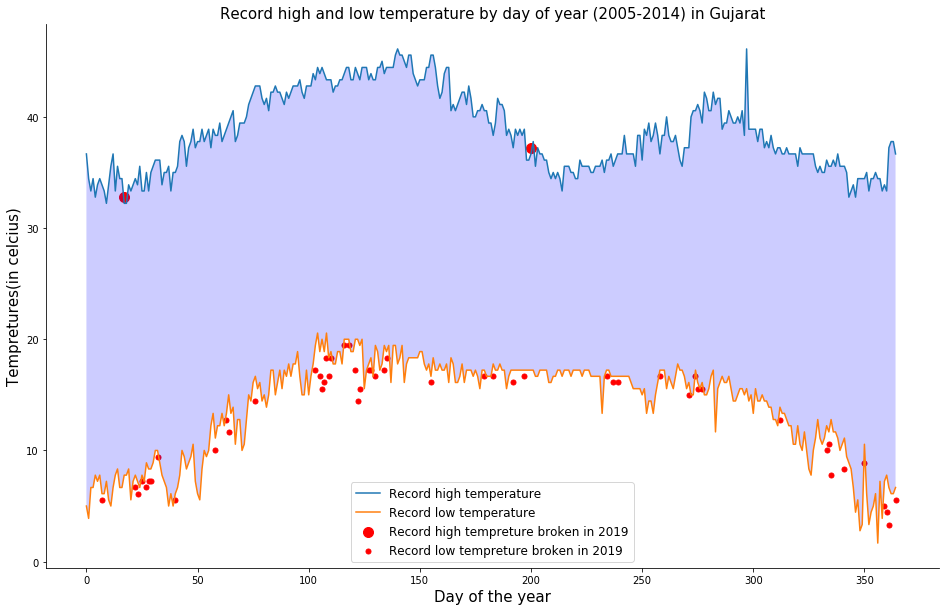

In [4]:
plt.figure(figsize=(16,10))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(days,record_high0514['TMAX'],'-',days,record_low0514['TMIN'],'-')
plt.scatter(x,alltime_high['TMAX'],s=100,c='r',marker='o')
plt.scatter(y,alltime_low['TMIN'],s=100,c='r',marker='.')
plt.legend(['Record high temperature','Record low temperature','Record high tempreture broken in 2019','Record low tempreture broken in 2019'],fontsize=12,loc='lower center')
plt.gca().fill_between(days,record_high0514['TMAX'],record_low0514['TMIN'],facecolor='blue',alpha=0.20)

plt.xlabel("Day of the year",fontsize=15)
plt.ylabel("Tempretures(in celcius)",fontsize=15)
plt.title("Record high and low temperature by day of year (2005-2014) in Gujarat",fontsize=15)


plt.show()